In [36]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

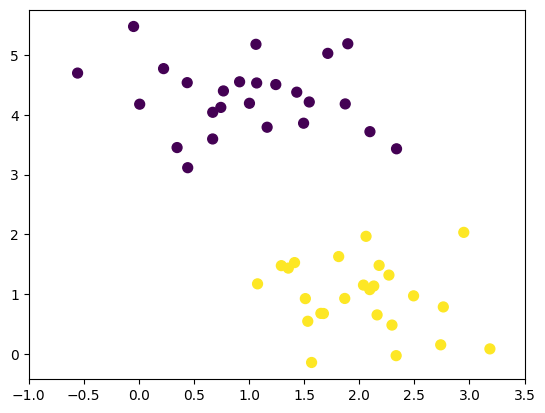

In [37]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
y = np.where(y == 1, 1, -1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlim(-1, 3.5);

In [38]:
class Perception:
    def __init__(self, dimension) -> None:
        self.w = np.zeros(dimension)
        self.b = np.zeros(1)

    def fit(self, X, y):
        while True:
            m = 0
            for (xi, yi) in zip(X, y):
                if yi * (xi @ self.w) + self.b <= 0:
                    self.w += yi * xi
                    self.b += yi
                    m += 1
            
            if m == 0:
                break
            
    def predict(self, x):
        return np.where(x @ self.w + self.b >= 0, 1, -1)
    
    @property
    def weights(self):
        return self.w
    
    @property
    def bias(self):
        return self.b
            

In [39]:
perception = Perception(2)
perception.fit(X, y)
perception.predict(X)

array([ 1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1])

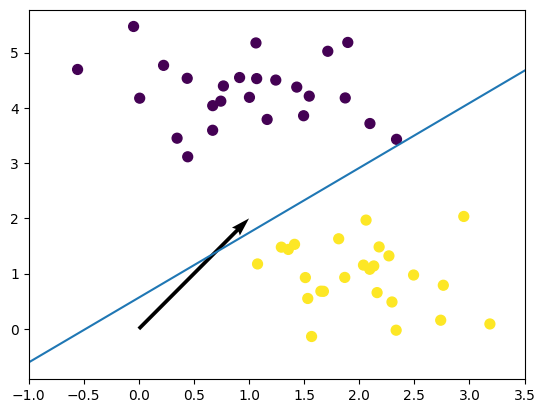

In [40]:
x_range = np.linspace(-1, 3.5, 100)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.plot(x_range, -(perception.weights[0] * x_range + perception.bias) / perception.weights[1])
plt.xlim(-1, 3.5);